# Explore Concepts needed for Lighting Controller

In [1]:
%matplotlib inline

import numpy as np
# from PIL import Image, ImageDraw, ImageColor
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import HTML
from IPython.display import Image as disp_Image
# import colorsys
# import re
# import time

from model_helper import *
from display_helper import *

## Light Profiles

In [2]:
m = Model()
display( m.get_color_profile() )

{'Candle': {'temp': 1900, 'rgb': (255, 147, 41)},
 '40W Tungsten': {'temp': 2600, 'rgb': (255, 197, 143)},
 '100W Tungsten': {'temp': 2850, 'rgb': (255, 214, 170)},
 'Halogen': {'temp': 3200, 'rgb': (255, 241, 224)},
 'Carbon Arc': {'temp': 5200, 'rgb': (255, 250, 244)},
 'High Noon Sun': {'temp': 5400, 'rgb': (255, 255, 251)},
 'Direct Sunlight': {'temp': 6000, 'rgb': (255, 255, 255)},
 'Overcast Sky': {'temp': 7000, 'rgb': (201, 226, 255)},
 'Clear Blue Sky': {'temp': 20000, 'rgb': (64, 156, 255)}}

## Model Configuration

In [3]:
for c in m.MODEL_CONFIG:
    print(f"\n'{c}': (rows,cols)=({m.MODEL_CONFIG[c]['leds']['rows']},{m.MODEL_CONFIG[c]['leds']['cols']}) => LED ID array shape: {m.MODEL_CONFIG[c]['led_ids'].shape}")
    print(m.MODEL_CONFIG[c]['led_ids'])


'Left': (rows,cols)=(5,6) => LED ID array shape: (5, 6)
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]]

'Right': (rows,cols)=(5,6) => LED ID array shape: (5, 6)
[[40 41 42 43 44 45]
 [46 47 48 49 50 51]
 [52 53 54 55 56 57]
 [58 59 60 61 62 63]
 [64 65 66 67 68 69]]

'Top': (rows,cols)=(2,3) => LED ID array shape: (2, 3)
[[30 31 32]
 [33 34 35]]


## Light Profiles on Simulated Model


Color Profile: Candle


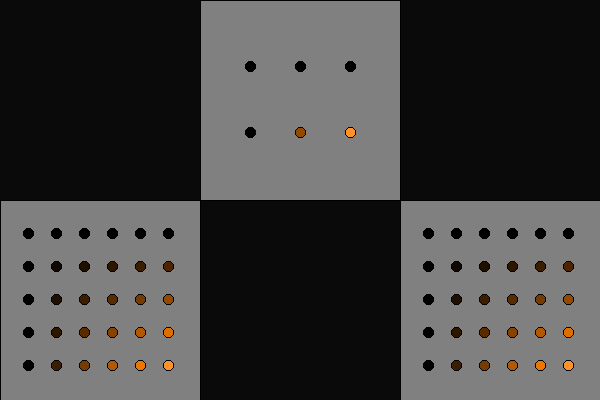


Color Profile: 40W Tungsten


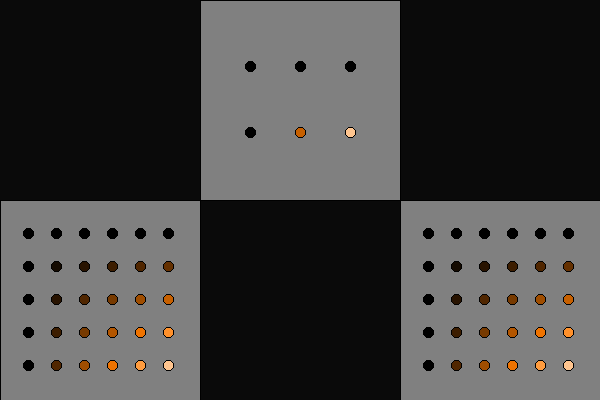


Color Profile: 100W Tungsten


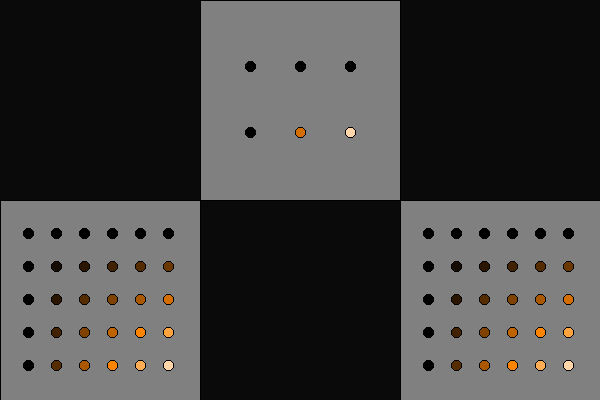


Color Profile: Halogen


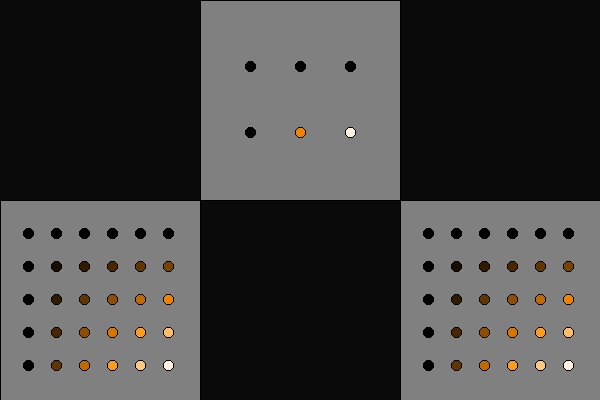


Color Profile: Carbon Arc


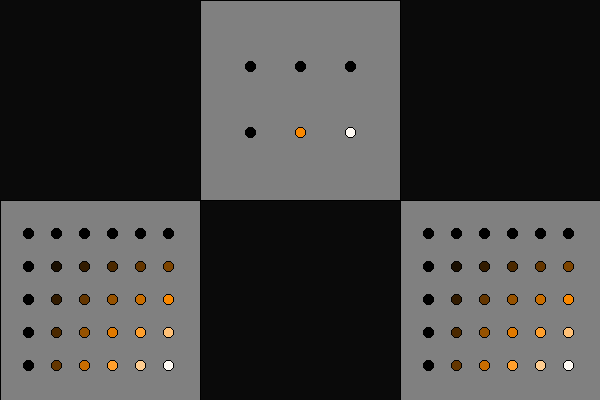


Color Profile: High Noon Sun


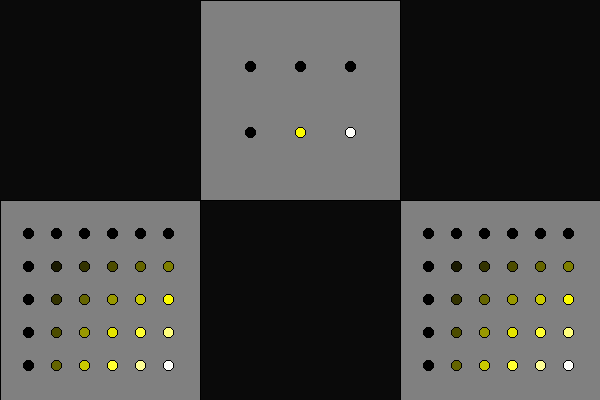


Color Profile: Direct Sunlight


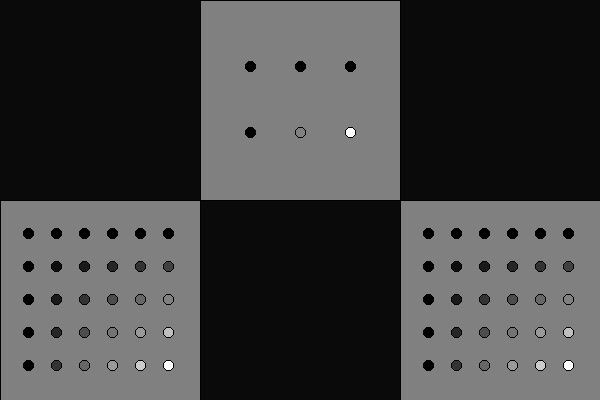


Color Profile: Overcast Sky


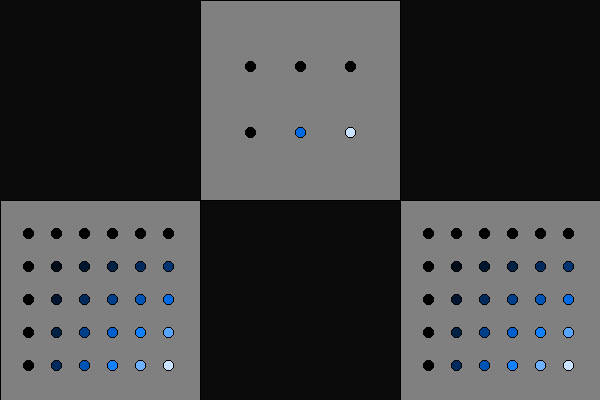


Color Profile: Clear Blue Sky


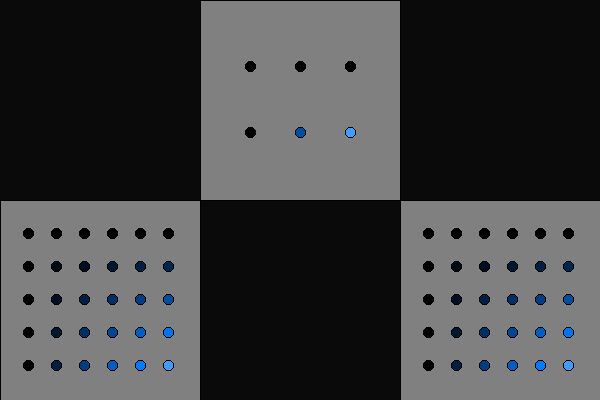

In [4]:
# Draw the model
m.draw_model_sides_top()

# Random LED brightness within color profile selection
for cp in m.COLOR_PROFILE:
    print(f"\nColor Profile: {cp}")
    led_colors = m.led_test_pattern('Range', cp )    
    m.draw_model_leds( led_colors ) 
    display( m.model )


## Animation of Changing Light Profiles

In [5]:
# # Create a model
# m = Model()

# # Fill the model LEDs with a single specified color
# def _helper_fill_leds( rgb:tuple ):
#     led_cols = {}
#     for c in m.MODEL_CONFIG:
#         led_cols[c] = np.full( (m.MODEL_CONFIG[c]['leds']['rows'], m.MODEL_CONFIG[c]['leds']['cols']), fill_value=rgb_to_string( rgb ) ) 

#     return led_cols

# # Draw the sides and top of the model
# m.draw_model_sides_top()

# # Draw the LEDs for each color profile and then add them together as a GIF
# images = []
# for p in m.COLOR_PROFILE:
#     rgb = m.COLOR_PROFILE[p]['rgb']
#     hls = rgb_int_to_hls( rgb )
#     hsv = rgb_int_to_hsv( rgb )
#     print(f"Profile: {p} => rgb: {rgb} => hls: ({hls[0]:.3f},{hls[1]:.3f},{hls[2]:.3f}), hsv: ({hsv[0]:.3f},{hsv[1]:.3f},{hsv[2]:.3f})")

#     lc = _helper_fill_leds( rgb )
#     m.draw_model_leds( lc )
#     images.append( m.model.copy() )

# # Display the GIF
# display_images( images, ms=500, loop=0 )

## Animate a Scenario

Scenario 'Idle' => LED Pattern: 'Come In', Color Profile 'Direct Sunlight' => rgb: (255, 255, 255) => hls: (0.000,1.000,0.000), hsv: (0.000,0.000,1.000)


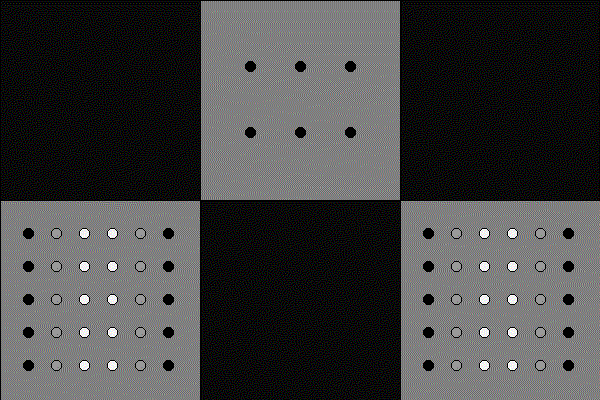

In [12]:
# Create a model
m = Model()

# Initialize the Light Scenario
SCENARIO = 'Idle'
m.init_model_scenario(SCENARIO)

cp = 'Direct Sunlight'
# cp = m.MODEL_SCENARIO_CONFIG[SCENARIO]['color_profile']

pat = 'Come In'
# pat = m.MODEL_SCENARIO_CONFIG[SCENARIO]['led_pattern']

rgb = m.COLOR_PROFILE[cp]['rgb']
hls = rgb_int_to_hls( rgb )
hsv = rgb_int_to_hsv( rgb )
print(f"Scenario '{SCENARIO}' => LED Pattern: '{pat}', Color Profile '{cp}' => rgb: {rgb} => hls: ({hls[0]:.3f},{hls[1]:.3f},{hls[2]:.3f}), hsv: ({hsv[0]:.3f},{hsv[1]:.3f},{hsv[2]:.3f})")

# Draw the sides and top of the model
m.draw_model_sides_top()

# Draw the LEDs for each color profile and then add them together as a GIF
images = []
for t in range(16):
    m.update_led_pattern( timestep=t, distance=None, proximity=None, override_cp=cp, override_pat=pat )
    images.append( m.model.copy() )

# Display the GIF
display_images( images, ms=250, loop=0 )

'40W Tungsten'